# Introducción a los Modelos de Regresión Lineal

Los modelos de regresión se utilizan para poder generar relaciones entre uno o más variables explicativas con una o más variables de respuesta. Existen diferentes tipo de modelos de regresión, yendo de los más particulares y complejos a los más sencillos podemos encontrar (Junto a como usarlas en python):
- **Deep Neural Networks**: https://pytorch.org/
- **Gradient Boosting Models**: https://lightgbm.readthedocs.io/en/stable/
- **Gaussian Process Regression**: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor
- **Regression Trees**: https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
- **Linear Regression**: El cual veremos ahora, que existen MUCHAS implementaciones de este modelo.

Este tipo de modelos se pueden definir como: Dado una variable explicativa $\mathbf{x}\in \mathbb{R}^n$ queremos encontrar una función $f: \mathbb{R}^n \to \mathbb{R}^m$ tal que $f(\mathbf{x}) = \mathbf{y}$ donde $y\in \mathbb{R}^m$. 

El modelo más sencillo que logra poder encontrar este tipo de relaciones es la **regresión lineal**. Este tipo de modelos se basan en la siguiente ecuación:
$$
y_i = \mathbf{b} \mathbf{x}_i + b_0 \quad \forall i 
$$

Es decir, la función $f$ que teníamos previamente busca predecir $y_i$ por medio de la combinación lineal de los componentes de $\mathbf{x}_i$. Donde i corresponde a una observación de nuestro set de datos.

# Regresión lineal simple

La regresión lineal simple es la forma más sencilla de una regresión lineal, en esta se busca relacionar una variable explicativa con una de respuesta mediante la ponderación de la variable explicativa más una constante. O en forma matemática.
$$
y_i = \beta_1 x_i + \beta_0 \quad \forall i
$$

Así, nuestra variable explicativa se relaciona de forma lineal con nuestra variable de respuesta. 


Muchas veces, los datos no calzan perfectamente con un modelo de este estilo debido al ruido en el sistema. Así, muchas veces se utiliza la siguiente forma del modelo para poder modeloar este tipo de relaciones.
$$
Y \sim \mathcal{N}(\mu_Y =  \beta_1 x +  \beta_0, \sigma ^ 2)
$$
Así, la variable $Y$ es una variable aleatoria centrada en la regresión lineal y con una varianza $\sigma^2$. Para simplicidad, este modelo también puede ser denotado como
$$
y = \beta_1 x + \beta_0 + \varepsilon
$$
Donde $\varepsilon \sim N(0, \sigma ^2)$. Así, $\varepsilon$ captura el ruido/error del sistema.

Ahora nuestro trabajo viene en saber como estimar los parámetros de la regresión lineal simple.

# VideoJuegos (Ahora con Regresión)

Para poder entender mejor los modelos de regresión, evaluaremos el dataset de VideoJuegos `Video_Game_Sales_as_of_Jan_2017.csv`.

In [3]:
import pandas as pd
def read_course_dataset(name):
    """
    Esta función se encargará de entregarles el set de datos desde el GitHub del curso
    ---
    Parameters
    name: str
        Nombre del set de datos a leer.
    ---
    Notes
    Datasets disponibles:
        - netflix_titles.csv
        - Video_Game_Sales_as_of_Jan_2017.csv
        - oscars_df.csv
    """
    link = 'https://github.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/SetDeDatos/'
    link += name + '?raw=true'
    df = pd.read_csv(link)
    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis = 1)

    return df
data = read_course_dataset('Video_Game_Sales_as_of_Jan_2017.csv')

## 1.

Realice la visualización de datos del dataset https://github.com/SysBioengLab/IIQ3402-Statistical-Design/blob/main/SetDeDatos/Video_Game_Sales_as_of_Jan_2017.csv ¿Qué variables poseen asociaciones lineales entre sí?

Una manera sencilla de evaluar si existen relaciones lineales entre datos es realizar la matriz de correlación.

Primero hay que evaluar cuales son las variables numéricas, de forma que el calculo de la covarianza sea eficiente.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17416 entries, 0 to 17415
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17416 non-null  object 
 1   Platform         17416 non-null  object 
 2   Year_of_Release  17408 non-null  float64
 3   Genre            17416 non-null  object 
 4   Publisher        17415 non-null  object 
 5   NA_Sales         17416 non-null  float64
 6   EU_Sales         17416 non-null  float64
 7   JP_Sales         17416 non-null  float64
 8   Other_Sales      17416 non-null  float64
 9   Global_Sales     17416 non-null  float64
 10  Critic_Score     8336 non-null   float64
 11  Critic_Count     8336 non-null   float64
 12  User_Score       7798 non-null   float64
 13  User_Count       7798 non-null   float64
 14  Rating           10252 non-null  object 
dtypes: float64(10), object(5)
memory usage: 2.0+ MB


<Axes: >

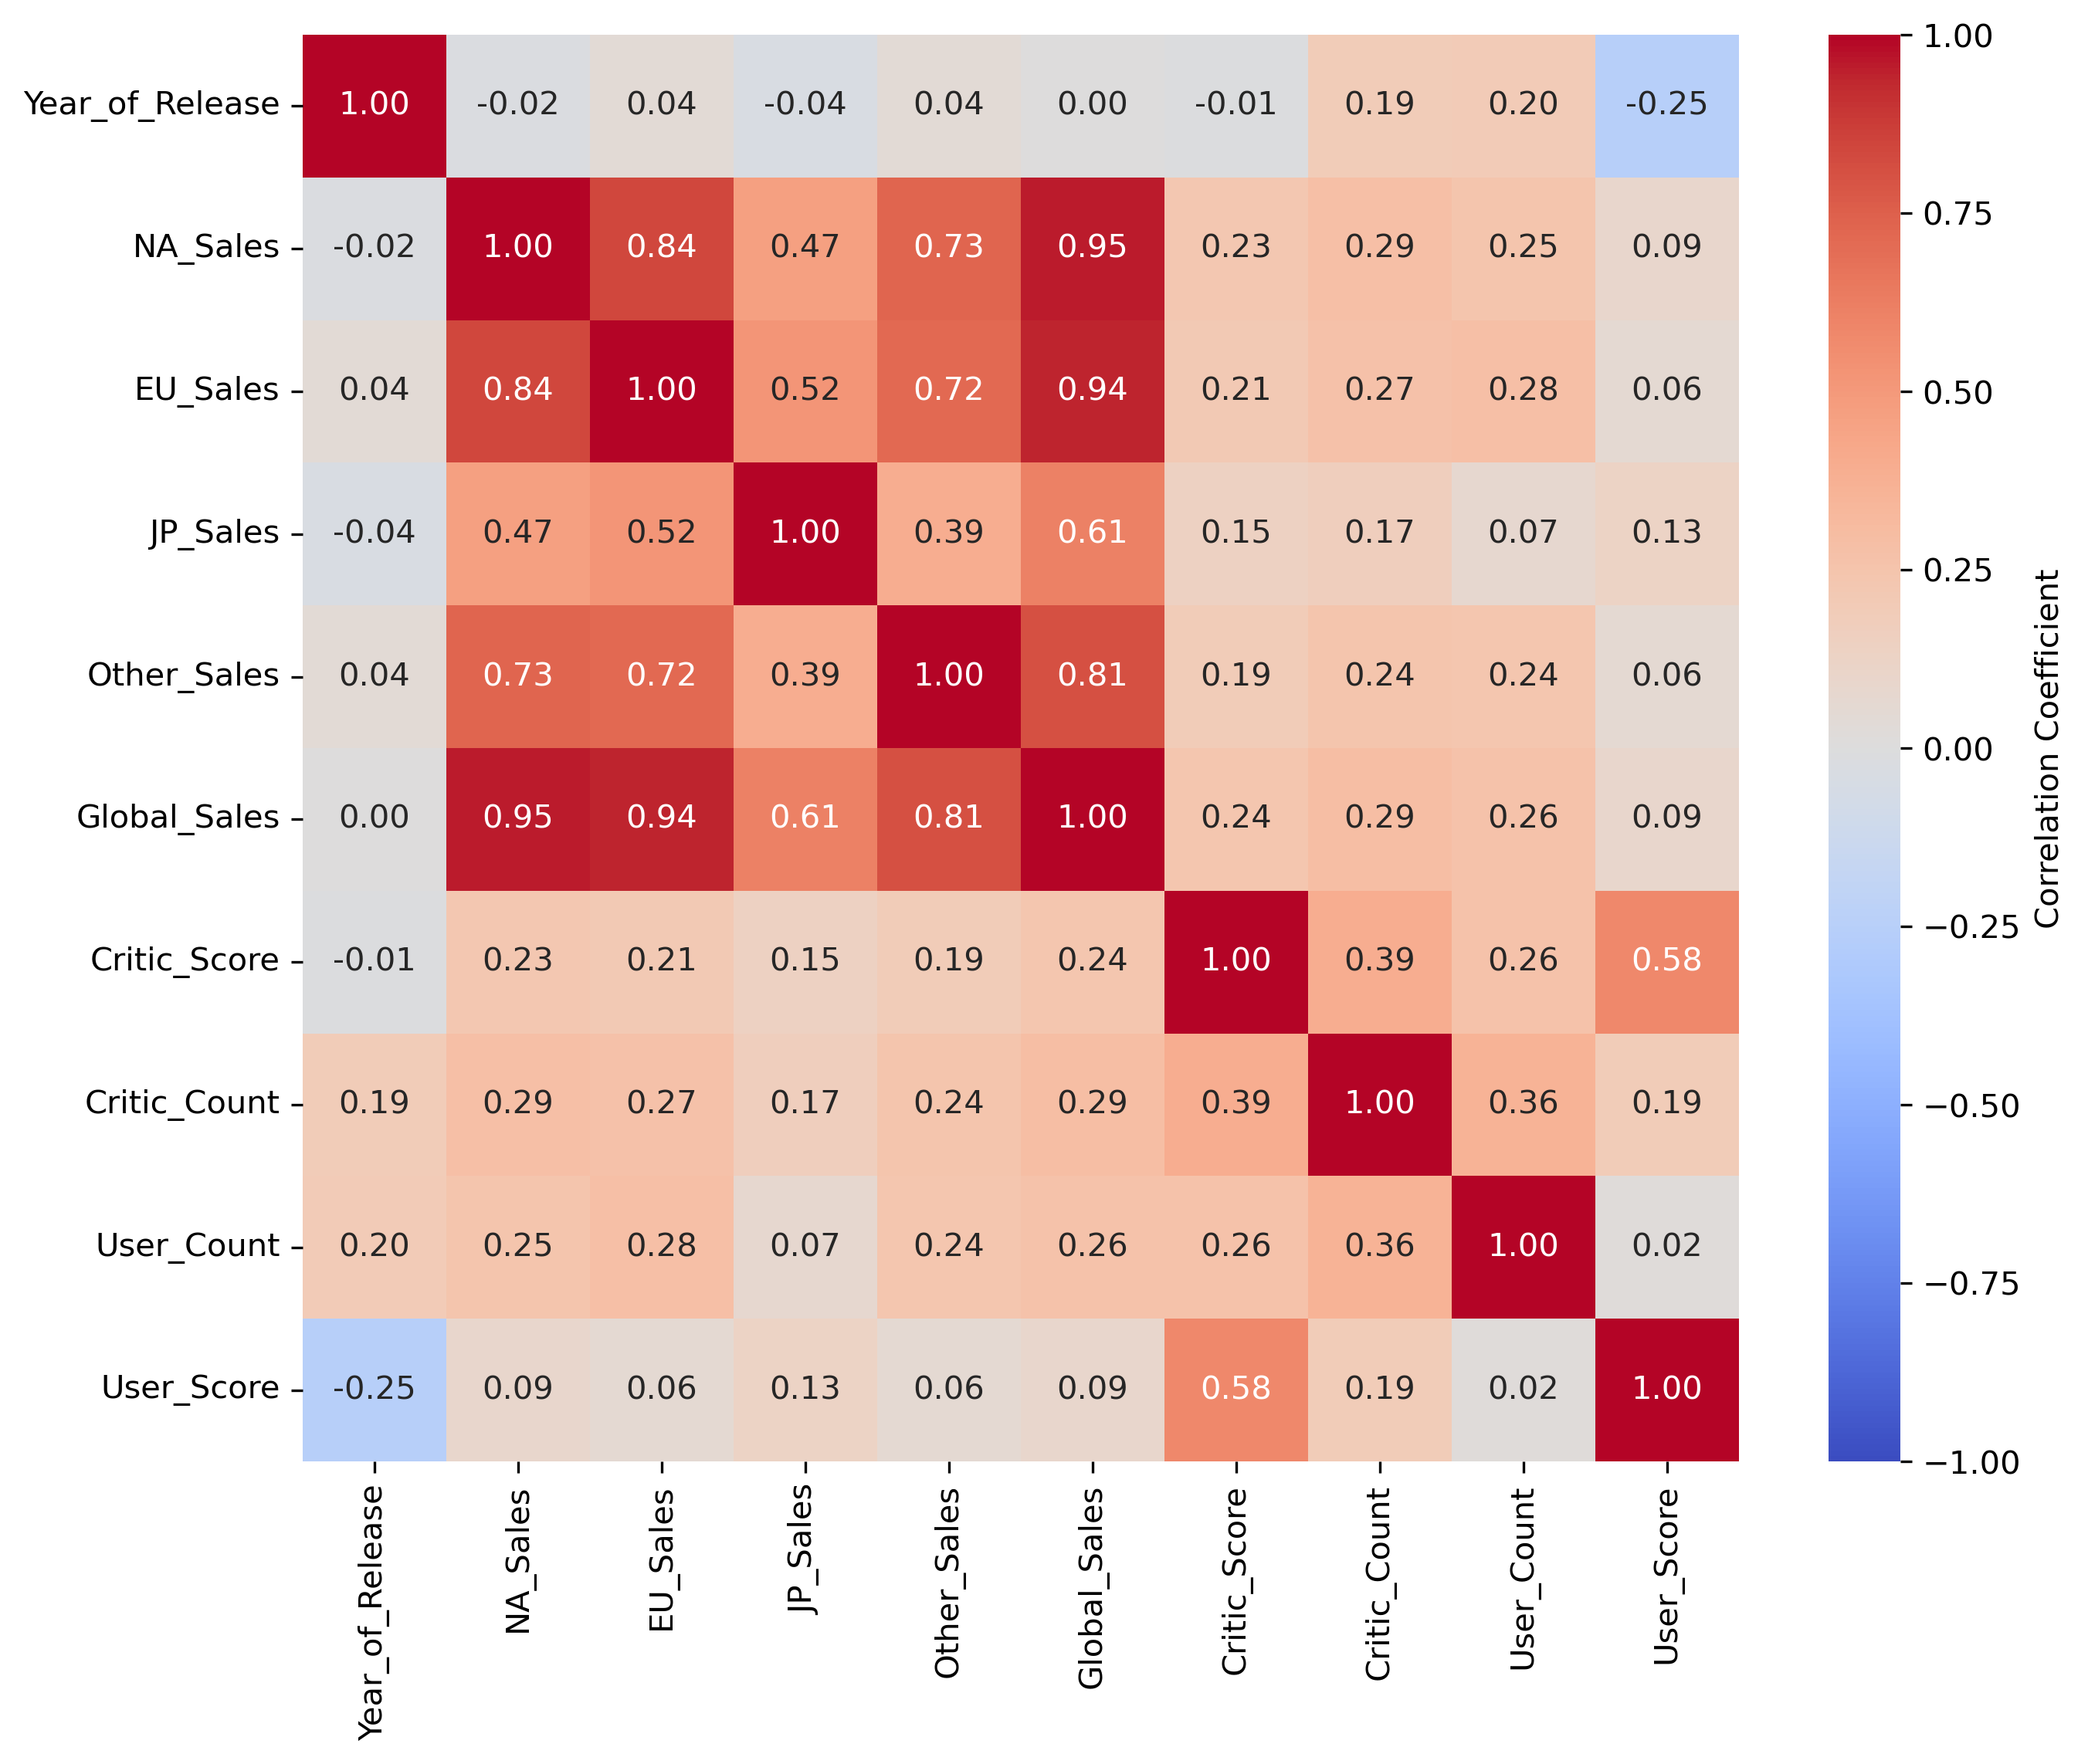

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric = ['Year_of_Release', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
           'Critic_Score', 'Critic_Count', 'User_Count', 'User_Score']
data_num = data[numeric].dropna() #eliminamos los NaN

corr_num = data_num.corr()
fig, ax = plt.subplots(figsize=(10, 8), dpi = 300)
sns.heatmap(corr_num, annot=True, fmt='.2f', cmap='coolwarm', 
            cbar_kws={'label': 'Correlation Coefficient'}, ax=ax, 
            vmin=-1, vmax=1)

Así, podemos ver cuales son los datos que se encuentran relacionados.

## 2. 

Analice la variable `Global_Sales`. ¿Cómo se relaciona con esta variable con los puntajes entregados por la crítica (`Critic_Score`) y los usuarios (`User_Score`)?

Text(0.5, 1.0, 'User Score vs Global Sales')

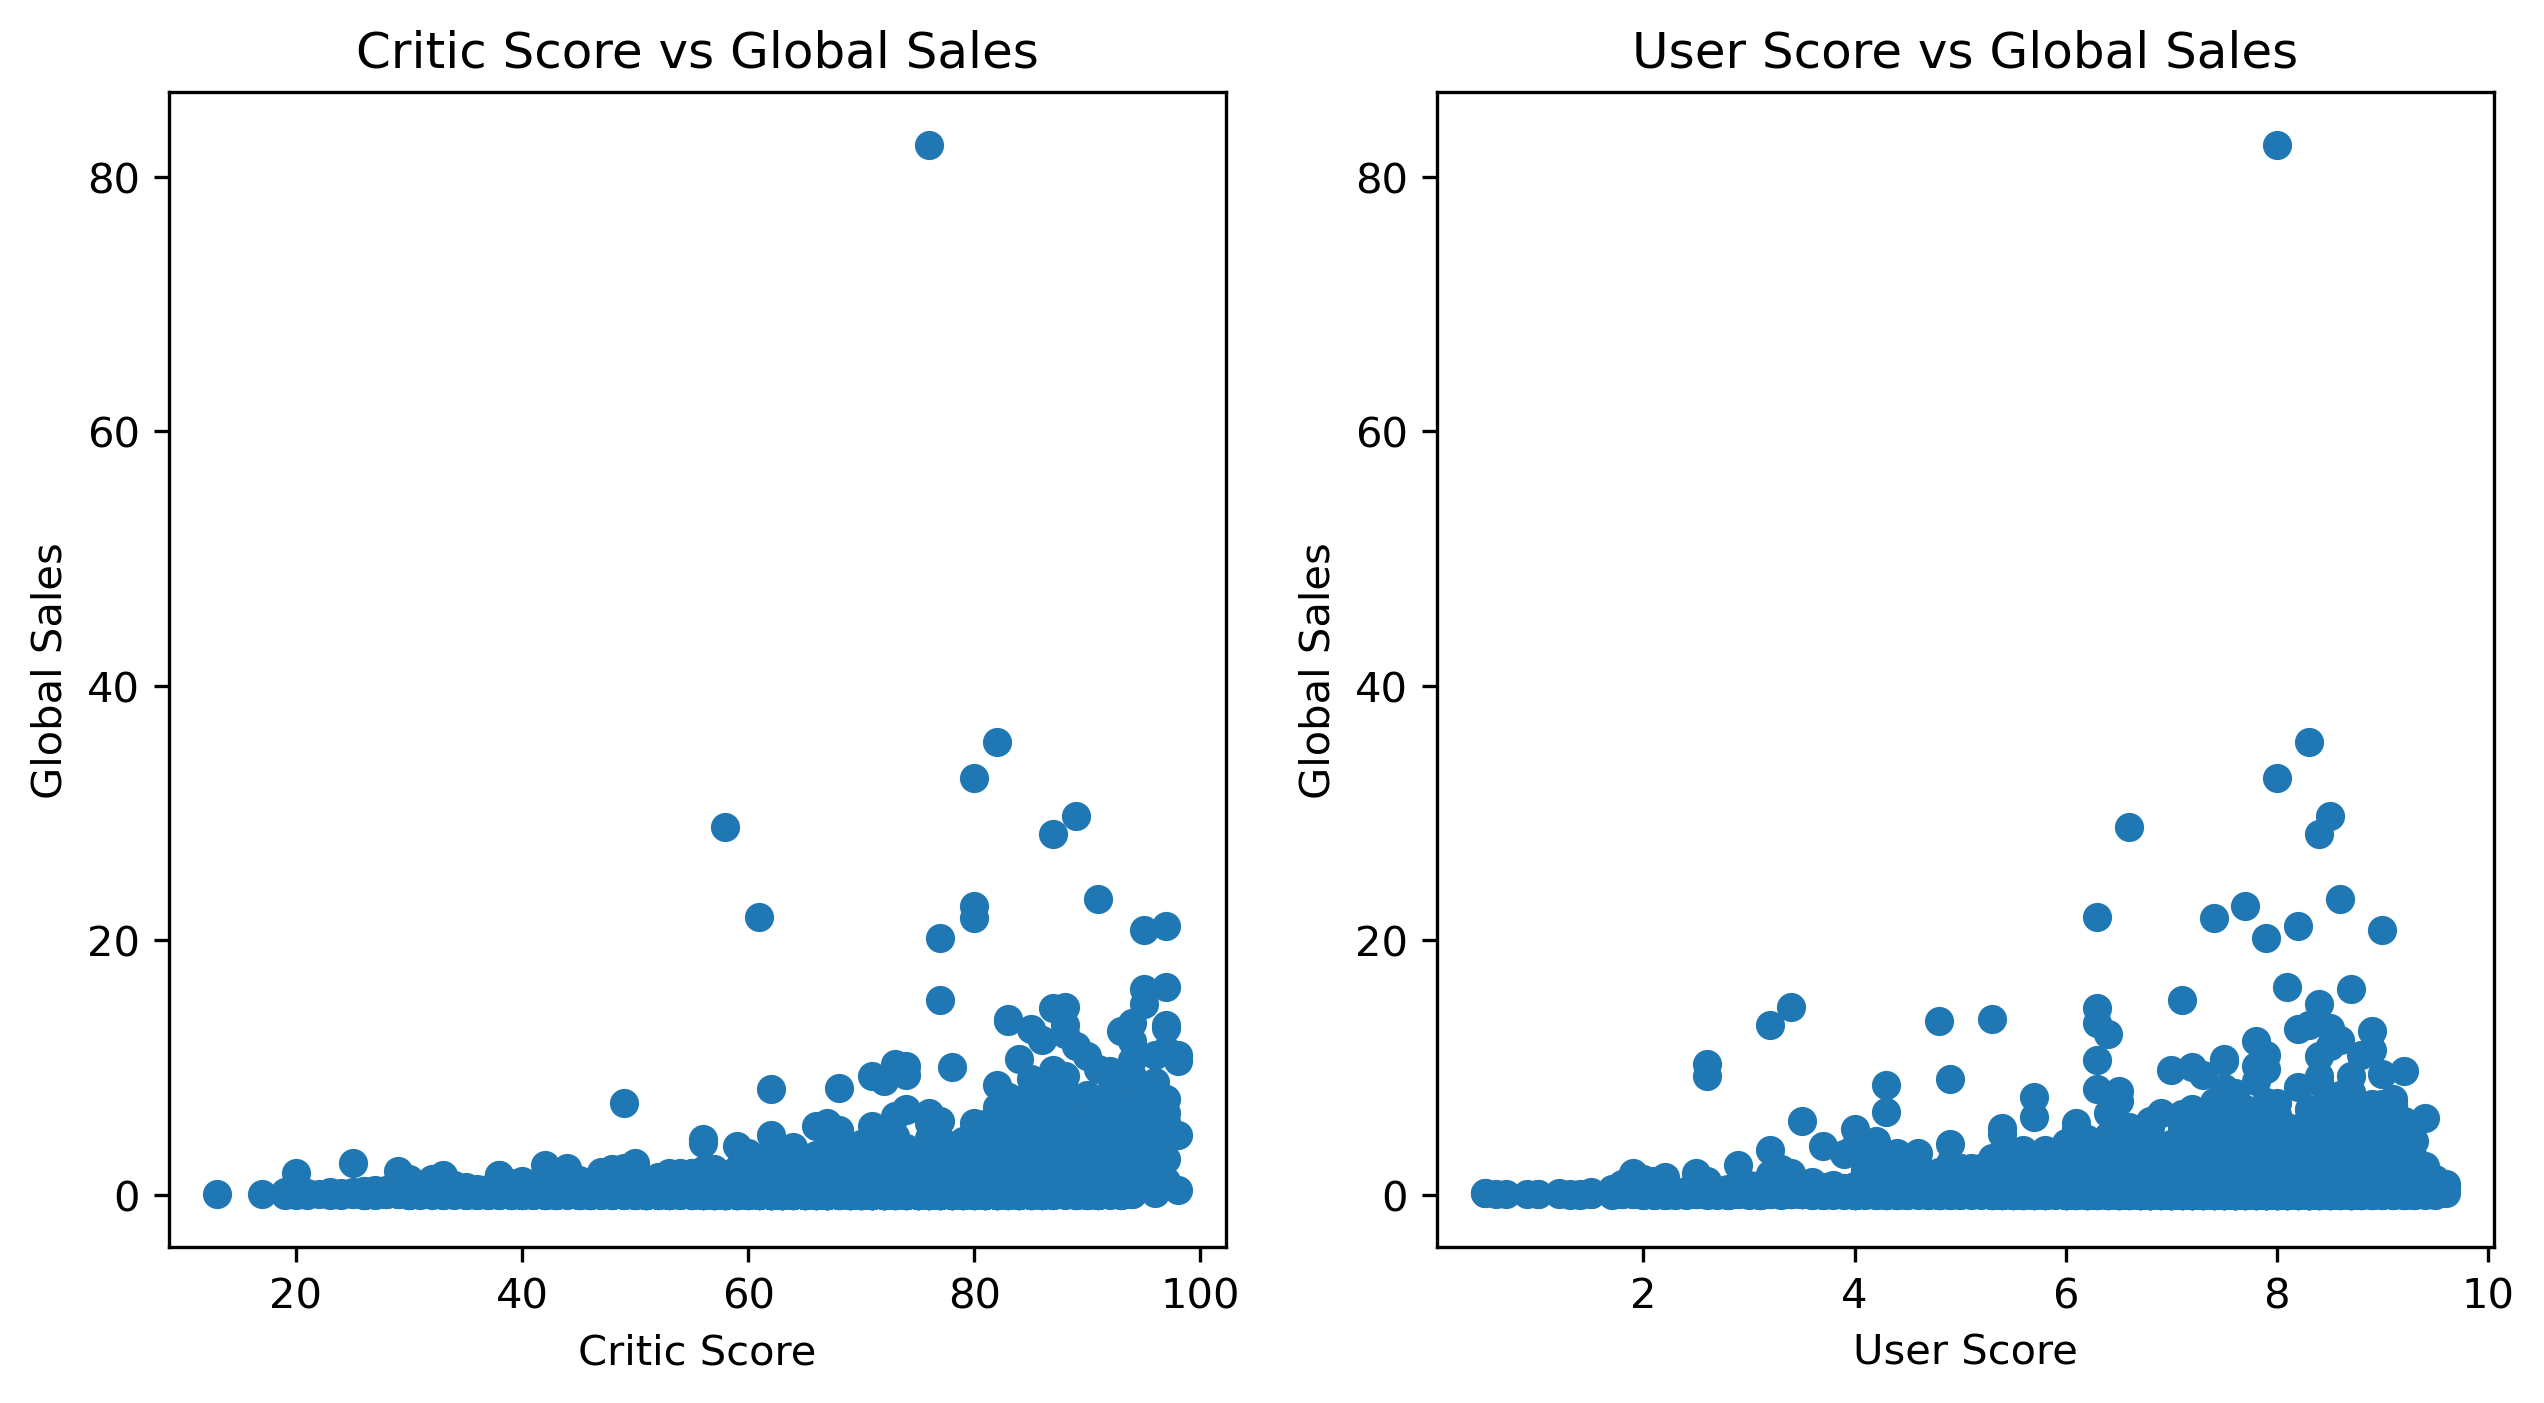

In [27]:
variables = data[['Global_Sales', 'Critic_Score', 'User_Score']].dropna()

fig, ax = plt.subplots(1, 2, figsize=(10, 5), dpi=300)
ax[0].scatter(variables['Critic_Score'], variables['Global_Sales'])
ax[0].set_xlabel('Critic Score')
ax[0].set_ylabel('Global Sales')
ax[0].set_title('Critic Score vs Global Sales')

ax[1].scatter(variables['User_Score'], variables['Global_Sales'])
ax[1].set_xlabel('User Score')
ax[1].set_ylabel('Global Sales')
ax[1].set_title('User Score vs Global Sales')


## 3.

Calcule la correlación de Pearson entre las variables explicativas `Critic_Score` y `User_Score` y la variable de respuesta `Global_Sales`. Reporte la varianza de cada variable, y la covarianza y correlación entre las variables explicativas y de respuesta.

In [ ]:
import numpy as np
critic_var = np.var(data['Critic_Score'])
user_var = np.var(data['User_Score'])
global_var = np.var(data['Global_Sales'])
covar